In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import glob
import torch
from torchvision.transforms import ToTensor
from PIL import UnidentifiedImageError

/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
merge_df = pd.read_csv("data/merge_df.csv")
images_csv = pd.read_csv("data/Images.csv")
fb_df = pd.read_json("data/cleaned_tabular_new.json")

In [3]:
image_paths = glob.glob('data/cleaned_images/*.jpg')
image_name = [x.split('/')[-1].split('.')[0] for x in image_paths]
image_df = pd.DataFrame({'image_name': image_name})
image_df

,image_name
0,8de5ca28-bd97-42df-98eb-7bc2eb5503be
1,8061626e-376c-437a-8f48-4ac38e480cb9
2,59c9ee19-48e9-47e0-9635-eaa5b2cb8e4c
3,6946affd-4b40-4c49-ae57-29a35531f69e
4,99816296-3e6f-40a5-86df-9c41c3b809a6
...,...
12663,deaa46ca-cd9c-43a2-a822-0ee9f07e5267
12664,be2bd244-5c8a-4263-94c3-e9d4e4112573
12665,147a4cab-f581-44a5-a9ee-39166f0693bb
12666,6d5270ee-41bb-4710-bce8-dea551df7027


In [4]:
#create a df for labels and category numbers to easily spot the categorised label
y_labelling = pd.DataFrame({'label': merge_df['main_category'],'category': merge_df['main_category']})
y_labelling 

,label,category
0,home_garden,home_garden
1,home_garden,home_garden
2,home_garden,home_garden
3,home_garden,home_garden
4,home_garden,home_garden
...,...,...
12365,video_games_consoles,video_games_consoles
12366,video_games_consoles,video_games_consoles
12367,video_games_consoles,video_games_consoles
12368,video_games_consoles,video_games_consoles


In [ ]:
y_labelling.dtypes

In [5]:
#create dictionary of category and convert to number
cat_dict = set(merge_df['main_category'])
cat_dict = {k: v for v, k in enumerate(cat_dict)}
#merge_df['main_category'] = merge_df['main_category'].map(cat_dict)
#y_labelling['category'] = y_labelling['category'].map(cat_dict)

In [ ]:
cat_dict

In [6]:
#merge image name df with merge df
image_cat_df = image_df.merge(merge_df, how='inner', left_on='image_name', right_on='id_x')
#drop all columns except for image name and main category
image_cat_df = image_cat_df[['image_name', 'main_category']]

In [7]:
image_cat_df

,image_name,main_category
0,8de5ca28-bd97-42df-98eb-7bc2eb5503be,clothes_footwear_accessories
1,8061626e-376c-437a-8f48-4ac38e480cb9,phones_mobile_phones_telecoms
2,59c9ee19-48e9-47e0-9635-eaa5b2cb8e4c,health_beauty
3,6946affd-4b40-4c49-ae57-29a35531f69e,other_goods
4,99816296-3e6f-40a5-86df-9c41c3b809a6,health_beauty
...,...,...
12365,deaa46ca-cd9c-43a2-a822-0ee9f07e5267,computers_software
12366,be2bd244-5c8a-4263-94c3-e9d4e4112573,other_goods
12367,147a4cab-f581-44a5-a9ee-39166f0693bb,music_films_books_games
12368,6d5270ee-41bb-4710-bce8-dea551df7027,appliances


In [ ]:
y_labelling.dtypes

In [8]:
complete_img_arr = []
image_array = []
img_name = []
image_category = []
for index, img in enumerate(image_paths[:12370]):
    images = image_cat_df['image_name'][index]
    image = Image.open(img)
    image = np.array(image)
    t = ToTensor()
    image = t(image)
    image = torch.flatten(image)
    image = image.numpy()
    category = image_cat_df['main_category'][index]
    image_array.append(image)
    img_name.append(images)
    image_category.append(category)
    cat_arr_list = image, category
    complete_img_arr.append(cat_arr_list)
    

In [9]:
image_data_dict = {
    'category': image_category, 'image_name': img_name, 'image_array': image_array, 'label': image_category
}

In [10]:
image_data_df = pd.DataFrame(image_data_dict, columns=['label','category','image_name', 'image_array'])
image_data_df

,label,category,image_name,image_array
0,clothes_footwear_accessories,clothes_footwear_accessories,8de5ca28-bd97-42df-98eb-7bc2eb5503be,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.011764706, 0.04313..."
1,phones_mobile_phones_telecoms,phones_mobile_phones_telecoms,8061626e-376c-437a-8f48-4ac38e480cb9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,health_beauty,health_beauty,59c9ee19-48e9-47e0-9635-eaa5b2cb8e4c,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,other_goods,other_goods,6946affd-4b40-4c49-ae57-29a35531f69e,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.847..."
4,health_beauty,health_beauty,99816296-3e6f-40a5-86df-9c41c3b809a6,"[0.0, 0.0, 0.0, 0.015686275, 0.02745098, 0.015..."
...,...,...,...,...
12365,computers_software,computers_software,deaa46ca-cd9c-43a2-a822-0ee9f07e5267,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.517..."
12366,other_goods,other_goods,be2bd244-5c8a-4263-94c3-e9d4e4112573,"[0.023529412, 0.015686275, 0.003921569, 0.0, 0..."
12367,music_films_books_games,music_films_books_games,147a4cab-f581-44a5-a9ee-39166f0693bb,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003921569, 0...."
12368,appliances,appliances,6d5270ee-41bb-4710-bce8-dea551df7027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
cat_dict = set(image_data_df['category'])
cat_dict = {k: v for v, k in enumerate(cat_dict)}
image_data_df['category'] = image_data_df['category'].map(cat_dict)

In [13]:
cat_dict

{'sports_leisure_travel': 0,
 'home_garden': 1,
 'office_furniture_equipment': 2,
 'diy_tools_materials': 3,
 'health_beauty': 4,
 'appliances': 5,
 'baby_kids_stuff': 6,
 'music_films_books_games': 7,
 'other_goods': 8,
 'clothes_footwear_accessories': 9,
 'video_games_consoles': 10,
 'computers_software': 11,
 'phones_mobile_phones_telecoms': 12}

In [12]:
image_data_df

,label,category,image_name,image_array
0,clothes_footwear_accessories,9,8de5ca28-bd97-42df-98eb-7bc2eb5503be,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.011764706, 0.04313..."
1,phones_mobile_phones_telecoms,12,8061626e-376c-437a-8f48-4ac38e480cb9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,health_beauty,4,59c9ee19-48e9-47e0-9635-eaa5b2cb8e4c,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,other_goods,8,6946affd-4b40-4c49-ae57-29a35531f69e,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.847..."
4,health_beauty,4,99816296-3e6f-40a5-86df-9c41c3b809a6,"[0.0, 0.0, 0.0, 0.015686275, 0.02745098, 0.015..."
...,...,...,...,...
12365,computers_software,11,deaa46ca-cd9c-43a2-a822-0ee9f07e5267,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.517..."
12366,other_goods,8,be2bd244-5c8a-4263-94c3-e9d4e4112573,"[0.023529412, 0.015686275, 0.003921569, 0.0, 0..."
12367,music_films_books_games,7,147a4cab-f581-44a5-a9ee-39166f0693bb,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003921569, 0...."
12368,appliances,5,6d5270ee-41bb-4710-bce8-dea551df7027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
y_labelling

In [14]:

X = list(image_data_df['image_array'])
y = list(image_data_df['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9896
2474
9896
2474


In [15]:
model = LogisticRegression()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('train scaled')
X_test = scaler.transform(X_test)
print('test scaled')

train scaled
test scaled


In [17]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/home/shah/miniconda3/envs/selenium_project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print(y_test[10])
print('Predicted Class is: %d' % predictions[10])

print(y_test[44])
print('Predicted Class is: %d' % predictions[44])

9
Predicted Class is: 2
9
Predicted Class is: 12


In [19]:
from sklearn import metrics

score = model.score(X_test, y_test)
print(score)

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

0.08245755860953921
[[ 7 28 15 10 19 11  8 15  9  6 11 17  7]
 [21 41 34 16 36 17 10 21 13 16 13 26 18]
 [19 26 27 19 22 11  7 26 14  7 16 16  7]
 [13 25 14 15 18 10  9 15 11 14  8 12  9]
 [10 25 26 19 24 23  8 11 17  5 16 16 16]
 [13 32 20 10 18 10  8 18 15 12  8 24 11]
 [10 12 11 10 12  7  7 14 13  9  8 14  9]
 [10 30 13 19 18  9 13 18 16 12 13 21 11]
 [ 8 33 22 10 20  9  4 25 11 12  7 19  6]
 [14 28 15  8 14 10  8  9 13  6  8 18  9]
 [ 8 23 12 20 18 13  9 19  8  7  8 14  9]
 [13 37 27 15 16 13  8 24 13 12  8 18 18]
 [11 19 14 10 17  5  7 13 11 12  5 13 12]]


Text(0.5, 1.0, 'Accuracy Score: 0.08245755860953921')

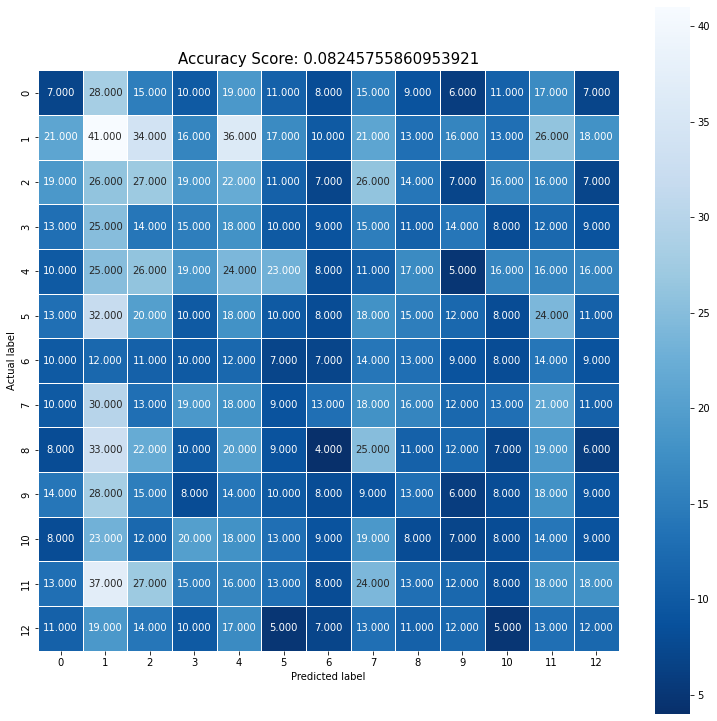

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

{'sports_leisure_travel': 0,
 'home_garden': 1,
 'office_furniture_equipment': 2,
 'diy_tools_materials': 3,
 'health_beauty': 4,
 'appliances': 5,
 'baby_kids_stuff': 6,
 'music_films_books_games': 7,
 'other_goods': 8,
 'clothes_footwear_accessories': 9,
 'video_games_consoles': 10,
 'computers_software': 11,
 'phones_mobile_phones_telecoms': 12}

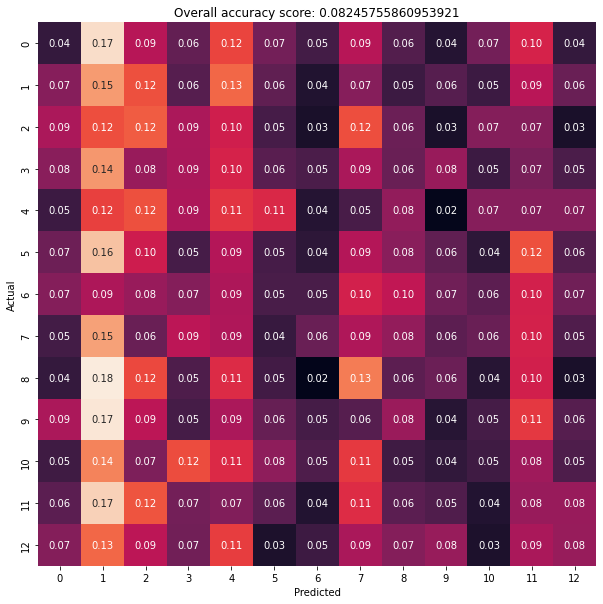

In [21]:
cm = pd.crosstab(y_test, predictions, 
                               rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
p.set_title(f'Overall accuracy score: {score}')
cat_dict

In [ ]:
image_data_df.columns

In [ ]:
image_data_df.drop(['image_category','image_name'], axis=1, inplace=True)

In [22]:
import pickle

save_path = "data/image_model_X.pkl"
X_data = image_data_df['image_array']
X_data = X_data.to_pickle(save_path)

In [ ]:
y_labelling

In [ ]:
y_labelling.drop(['label'], axis=1, inplace=True)

In [23]:
save_path = "data/image_model_y.pkl"
y_data = image_data_df['category']
y_data = y_data.to_pickle(save_path)

In [24]:
save_path = "data/image_model_data.csv"
y_data = image_data_df
y_data = y_data.to_csv(save_path)